In [1]:
from matplotlib import pyplot as plt
from matplotlib import animation

import networkx as nx
import numpy as np
import numpy.ma as ma
import pandas as pd

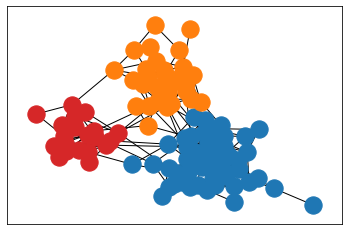

In [2]:
sizes = [20, 50, 30]
probs = [[0.25,0.01, 0.01], [0.01, 0.1, 0.01], [0.01, 0.01, 1/6]]
G = nx.stochastic_block_model(sizes, probs, seed=30)
A = nx.convert_matrix.to_numpy_matrix(G)

pos = nx.spring_layout(G, seed=3113794652)
nx.draw_networkx_nodes(G, pos, nodelist=range(0,sizes[0]), node_color="tab:red")
nx.draw_networkx_nodes(G, pos, nodelist=range(sizes[0], sizes[0]+sizes[1]), node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, nodelist=range(sizes[0]+sizes[1], 100), node_color="tab:orange")
nx.draw_networkx_edges(G, pos)

# Run baseline strategy

1. Go if any of your friends went and it wasn't too crowded last time
2. Otherwise go with small random probability

In [15]:
def plot_mask(t, friends, mask, color):
    x = np.take(t, np.where(mask))
    y = np.take(friends, np.where(mask))
    plt.scatter(x=x, y=y,color=color)
    

def summarize_run(Xs):
    Xnp = np.hstack(Xs)
    attendance = np.ravel(Xnp.sum(axis=0))
    
    plt.figure()
    plt.plot(attendance)
    plt.plot([0, n_iter], [M, M], "--")
    plt.title("Attendance by week")
    
    plt.figure()

    too_full = attendance > 60

    # col j has the number of friends of each node
    # that attended on week j
    # mask agents that did not attend
    fma = ma.masked_array(A.dot(Xnp), 1-Xnp)
    # mean friend count per week
    friends = np.ravel(fma.mean(axis=0).data)
    too_full = Xnp.sum(axis=0) > 60

    t = range(len(friends))
    plot_mask(t, friends, too_full, "r")
    plot_mask(t, friends, [~c for c in too_full], "g")
    plt.title("Average friend count of attendees")

In [21]:
rng = np.random.default_rng()

# random initial conditions
X = rng.uniform(size=(100,1)) < 0.3
Xs = [X]
eps = 0.03 # small random probability for cold start
M = 60 # maximum capacity before it's too crowded
n_iter = 100

for _ in range(n_iter):
    if X.sum() < M:
        X  = X + (A.dot(X) > 0)
    else:
        X = np.zeros(shape=(100,1))

    X += rng.uniform(size=(100,1)) < eps
    Xs.append(X)

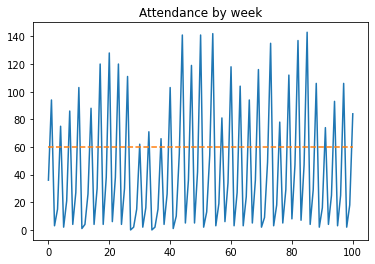

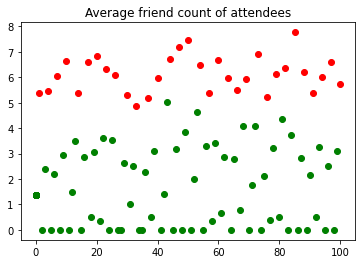

In [22]:
summarize_run(Xs)

This strategy will just keep spreading until blows up, and then start again with a small random group.  What happens if you only go back if at least 2 friends were there?

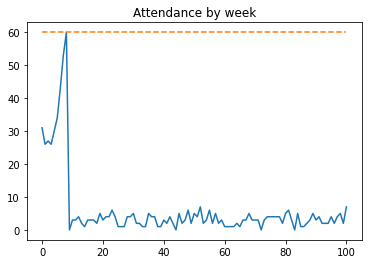

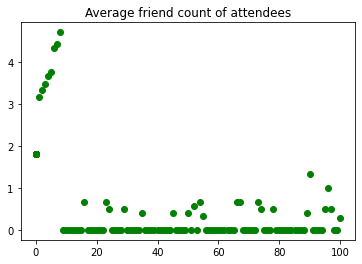

In [27]:
# random initial conditions
X = rng.uniform(size=(100,1)) < 0.3
Xs = [X]
eps = 0.03 # small random probability for cold start
M = 60 # maximum capacity before it's too crowded
n_iter = 100

# how many friends do you need to be there to go back
minfriends = 2

for _ in range(n_iter):
    if X.sum() < M:
        # go if enough of your friends went last week
        # whether or not you went
        X = (A.dot(X) > minfriends)
    else:
        X = np.zeros(shape=(100,1))

    X += rng.uniform(size=(100,1)) < eps
    Xs.append(X)
    
summarize_run(Xs)

Okay so now nobody goes because they don't have enough of their friends going to get a group together.  I think there must be some triangles that would have some sort of unstable equilibrium?

What if we start with one of the communities as an initial condition?

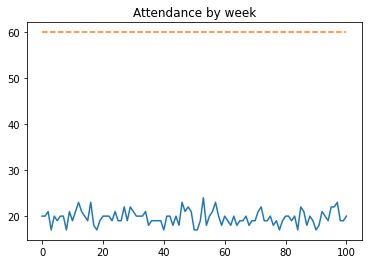

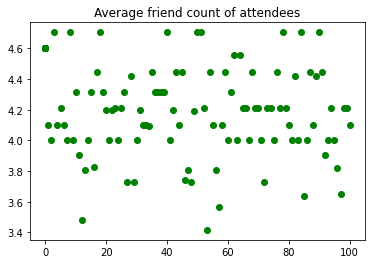

In [36]:
X = np.zeros((100,1))
X[:sizes[0]] = 1

Xs = [X]
eps = 0.03 # small random probability for cold start
M = 60 # maximum capacity before it's too crowded
n_iter = 100

# how many friends do you need to be there to go back
minfriends = 2

for _ in range(n_iter):
    if X.sum() < M:
        # go if enough of your friends went last week
        # whether or not you went
        X = (A.dot(X) > minfriends)
    else:
        X = np.zeros(shape=(100,1))

    X += rng.uniform(size=(100,1)) < eps
    Xs.append(X)
    
summarize_run(Xs)

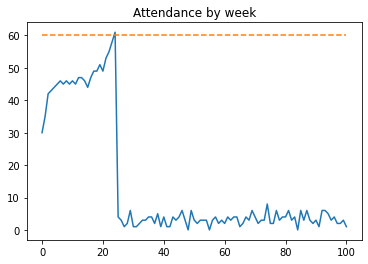

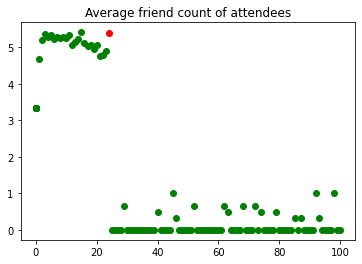

In [40]:
X = np.zeros((100,1))
X[sizes[0]:sizes[1]] = 1

Xs = [X]
eps = 0.03 # small random probability for cold start
M = 60 # maximum capacity before it's too crowded
n_iter = 100

# how many friends do you need to be there to go back
minfriends = 2

for _ in range(n_iter):
    if X.sum() < M:
        # go if enough of your friends went last week
        # whether or not you went
        X = (A.dot(X) > minfriends)
    else:
        X = np.zeros(shape=(100,1))

    X += rng.uniform(size=(100,1)) < eps
    Xs.append(X)
    
summarize_run(Xs)

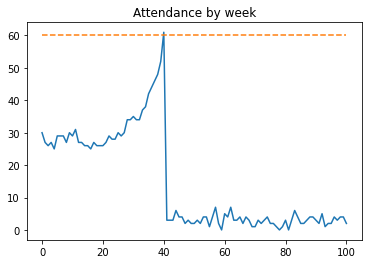

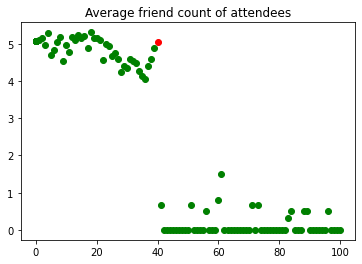

In [41]:
X = np.zeros((100,1))
X[sizes[0] + sizes[1]:] = 1

Xs = [X]
eps = 0.03 # small random probability for cold start
M = 60 # maximum capacity before it's too crowded
n_iter = 100

# how many friends do you need to be there to go back
minfriends = 2

for _ in range(n_iter):
    if X.sum() < M:
        # go if enough of your friends went last week
        # whether or not you went
        X = (A.dot(X) > minfriends)
    else:
        X = np.zeros(shape=(100,1))

    X += rng.uniform(size=(100,1)) < eps
    Xs.append(X)
    
summarize_run(Xs)

Okay so there are two issues here with stability.  One is that it's hard to get the seed of critical mass to start a repeat group going.  The other is that once it gets over capacity the whole thing is completely destroyed.  Just out of curiosity, before addressing either of those, will a critical mass eventually emerge if we run it for much longer?

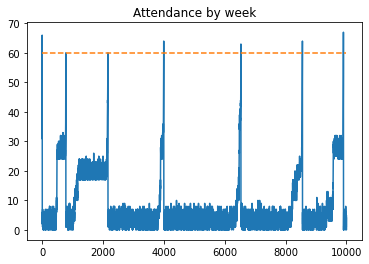

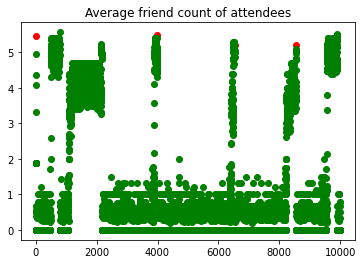

In [42]:
X = rng.uniform(size=(100,1)) < 0.3

Xs = [X]
eps = 0.03 # small random probability for cold start
M = 60 # maximum capacity before it's too crowded
n_iter = 10000

# how many friends do you need to be there to go back
minfriends = 2

for _ in range(n_iter):
    if X.sum() < M:
        # go if enough of your friends went last week
        # whether or not you went
        X = (A.dot(X) > minfriends)
    else:
        X = np.zeros(shape=(100,1))

    X += rng.uniform(size=(100,1)) < eps
    Xs.append(X)
    
summarize_run(Xs)

Yes!  It will emerge it just blows up really fast when it happens.  How can we make this less explode-y?  We could use memory, or set a higher bar for friends?  Hmmmmmmm

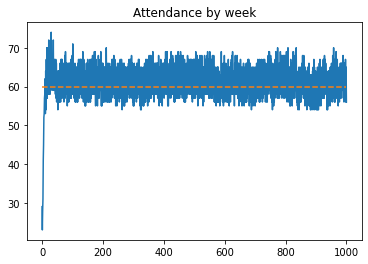

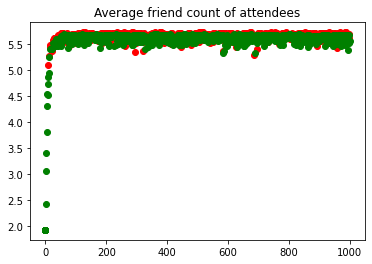

In [44]:
X = rng.uniform(size=(100,1)) < 0.3

Xs = [X]
eps = 0.03 # small random probability for cold start
M = 60 # maximum capacity before it's too crowded
n_iter = 1000

# how many friends do you need to be there to go back
minfriends = 2

# how many friends do you need to be there to go back
# even though it was too crowded
minbad = 3

for _ in range(n_iter):
    if X.sum() < M:
        # go if enough of your friends went last week
        # whether or not you went
        X = (A.dot(X) > minfriends)
    else:
        X = (A.dot(X) > minbad)

    X += rng.uniform(size=(100,1)) < eps
    Xs.append(X)
    
summarize_run(Xs)

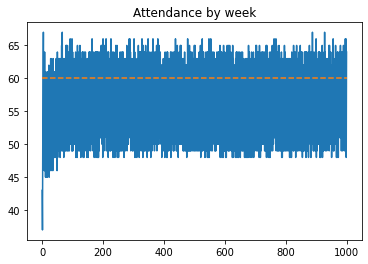

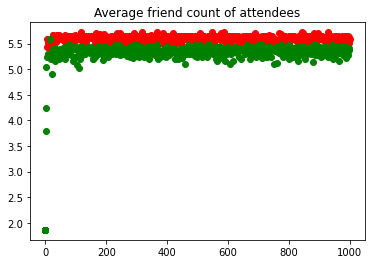

In [45]:
X = rng.uniform(size=(100,1)) < 0.3

Xs = [X]
eps = 0.03 # small random probability for cold start
M = 60 # maximum capacity before it's too crowded
n_iter = 1000

# how many friends do you need to be there to go back
minfriends = 2

# how many friends do you need to be there to go back
# even though it was too crowded
minbad = 4

for _ in range(n_iter):
    if X.sum() < M:
        # go if enough of your friends went last week
        # whether or not you went
        X = (A.dot(X) > minfriends)
    else:
        X = (A.dot(X) > minbad)

    X += rng.uniform(size=(100,1)) < eps
    Xs.append(X)
    
summarize_run(Xs)

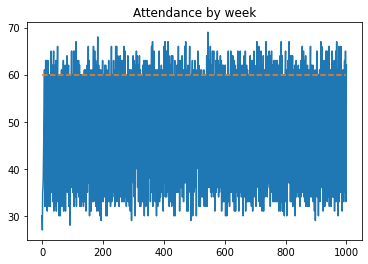

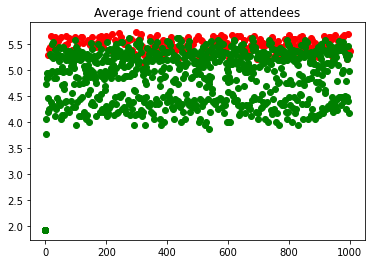

In [46]:
X = rng.uniform(size=(100,1)) < 0.3

Xs = [X]
eps = 0.03 # small random probability for cold start
M = 60 # maximum capacity before it's too crowded
n_iter = 1000

# how many friends do you need to be there to go back
minfriends = 2

# how many friends do you need to be there to go back
# even though it was too crowded
minbad = 5

for _ in range(n_iter):
    if X.sum() < M:
        # go if enough of your friends went last week
        # whether or not you went
        X = (A.dot(X) > minfriends)
    else:
        X = (A.dot(X) > minbad)

    X += rng.uniform(size=(100,1)) < eps
    Xs.append(X)
    
summarize_run(Xs)

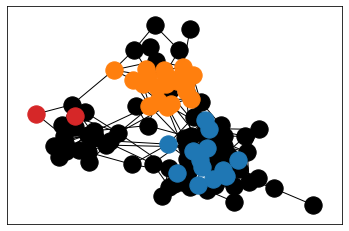

In [98]:
# track the boundaries between communities
# instead of the size
transitions = np.array(sizes)

for i in range(len(transitions)-1):
    transitions[i + 1] = transitions[i + 1] + transitions[i]

    
t = 2
Xnp = np.hstack(Xs)

went = np.where([Xnp[:,t]])[1]
home = np.where([1 - Xnp[:,t]])[1]

nx.draw_networkx_nodes(G, pos, nodelist=home, node_color="black")

colors = ["tab:red", "tab:blue", "tab:orange"]

for i, c in enumerate(colors):
    # which members of group i went?
    mask = went < transitions[i]
    
    if i > 0:
        mask = np.logical_and(mask, went > transitions[i-1])

    nx.draw_networkx_nodes(G, pos, nodelist=went[np.where(mask)], node_color=c)

nx.draw_networkx_edges(G, pos)

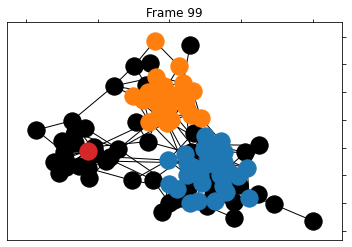

In [114]:
def simple_update(t, n, pos, G, ax):
    ax.clear()
    Xnp = np.hstack(Xs)

    went = np.where([Xnp[:,t]])[1]
    home = np.where([1 - Xnp[:,t]])[1]

    nx.draw_networkx_nodes(G, pos, nodelist=home, node_color="black")

    colors = ["tab:red", "tab:blue", "tab:orange"]

    for i, c in enumerate(colors):
        # which members of group i went?
        mask = went < transitions[i]

        if i > 0:
            mask = np.logical_and(mask, went > transitions[i-1])

        nx.draw_networkx_nodes(G, pos, nodelist=went[np.where(mask)], node_color=c)

    nx.draw_networkx_edges(G, pos)

    # Set the title
    ax.set_title("Frame {}".format(t))
    
    
    
fig, ax = plt.subplots(figsize=(6,4))
simple_update(2, 1, pos, G, ax)

ani = animation.FuncAnimation(fig, simple_update, frames=100, fargs=(1, pos, G, ax))
ani.save('animation_1.gif', writer="pillow")

0


IndexError: list index out of range

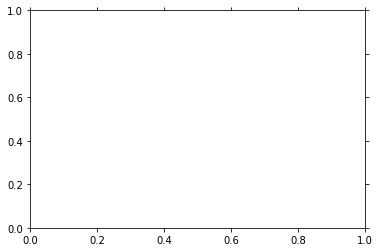

In [111]:
def simple_update(t, n, pos, G, ax):
    ax.clear()
    Xnp = np.hstack(Xs)

    went = np.where([Xnp[:,t]])[1]
    home = np.where([1 - Xnp[:,t]])[1]

    nx.draw_networkx_nodes(G, pos, nodelist=home, node_color="black")

    colors = ["tab:red", "tab:blue", "tab:orange"]

    for i, c in enumerate(colors):
        # which members of group i went?
        mask = went < transitions[i]

        if i > 0:
            mask = np.logical_and(mask, went > transitions[i-1])

        nx.draw_networkx_nodes(G, pos, nodelist=went[np.where(mask)], node_color=c)

    nx.draw_networkx_edges(G, pos)

    # Set the title
    ax.set_title("Frame {}".format(t))
    
    
def simple_animation():

    # Build plot
    fig, ax = plt.subplots(figsize=(6,4))

    # Create a graph and layout
    n = 30 # Number of nodes
    m = 70 # Number of edges
    G = nx.gnm_random_graph(n, m)
    layout = nx.spring_layout(G)

    ani = animation.FuncAnimation(fig, simple_update, frames=10, fargs=(n, pos, G, ax))
    ani.save('animation_1.gif', writer="pillow")

    plt.show()

simple_animation()

In [95]:
transitions = np.array(sizes)

for i in range(len(transitions)-1):
    transitions[i + 1] = transitions[i + 1] + transitions[i]

transitions

array([ 20,  70, 100])

In [75]:
np.ones(len(went), dtype=bool)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
nx.draw_networkx_nodes(G, pos, nodelist=range(0,sizes[0]), node_color="tab:red")
nx.draw_networkx_nodes(G, pos, nodelist=range(sizes[0], sizes[0]+sizes[1]), node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, nodelist=range(sizes[0]+sizes[1], 100), node_color="tab:orange")
nx.draw_networkx_edges(G, pos)

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
layout = pos

# *t* tracks timestep to animate
t = 0

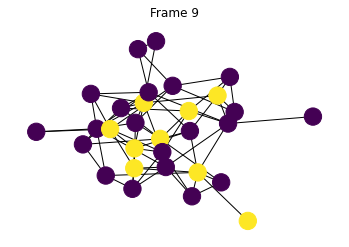

In [50]:



def simple_update(num, n, layout, G, ax):
    ax.clear()

    # Draw the graph with random node colors
    random_colors = np.random.randint(2, size=n)
    nx.draw(G, pos=layout, node_color=random_colors, ax=ax)

    # Set the title
    ax.set_title("Frame {}".format(num))


def simple_animation():

    # Build plot
    fig, ax = plt.subplots(figsize=(6,4))

    # Create a graph and layout
    n = 30 # Number of nodes
    m = 70 # Number of edges
    G = nx.gnm_random_graph(n, m)
    layout = nx.spring_layout(G)

    ani = animation.FuncAnimation(fig, simple_update, frames=10, fargs=(n, layout, G, ax))
    ani.save('animation_1.gif', writer="pillow")

    plt.show()

simple_animation()

In [57]:
np.hstack(Xs).shape

(100, 1001)